### Importing Dependencies

In [2]:
# Importing the pandas library for data manipulation
import pandas as pd

# The csv library can be used for handling CSV files
# import csv

# Importing seaborn for advanced data visualization
import seaborn as sns

# Importing numpy for numerical operations
import numpy as np

# Importing matplotlib.pyplot for plotting graphs
import matplotlib.pyplot as plt

# Importing torch for deep learning tasks with PyTorch
import torch

# Suppressing warnings to prevent unnecessary output during execution
import warnings
warnings.filterwarnings('ignore')

# Importing custom text cleaning functions from lang8_cleaning module
from lang8_cleaning import removepunc, removesm, removesp, minordist, handle_contractions, lowercase, normalize_text

### Converting tsv to csv and handling tokenization issue

In [ ]:
# tsv_file_path = 'clang8/output_data/clang8_source_target_en.spacy_tokenized.tsv'
# csv_file_path = 'clang8_source_target_en.spacy_tokenized.csv'

# with open(tsv_file_path, 'r', newline='', encoding='utf-8') as tsvfile:
#     # Create a TSV reader
#     tsvreader = csv.reader(tsvfile, delimiter='\t')

#     # Filter rows with more than two columns
#     filtered_rows = [row for row in tsvreader if len(row) == 2]

#     # Write filtered rows to CSV file
#     with open(csv_file_path, 'w', newline='', encoding='utf-8') as csvfile:
#         # Create a CSV writer
#         csvwriter = csv.writer(csvfile, delimiter=',')

#         # Write each filtered row to the CSV file
#         csvwriter.writerows(filtered_rows)

### Loading converted csv file

In [4]:
# Reading a CSV file containing tokenized text data and storing it in a DataFrame
df = pd.read_csv('clang8_source_target_en.spacy_tokenized.csv')
df

,0,1
0,About winter,About winter
1,This is my second post .,This is my second post .
2,I will appreciate it if you correct my sentenc...,I would appreciate it if you corrected my sent...
3,It 's been getting colder these days here in J...,It 's been getting colder these days here in J...
4,The summer weather in Japan is not agreeable t...,The summer weather in Japan is not agreeable t...
...,...,...
2350977,And ask me where to buy that bag .,And ask me where to buy that bag .
2350978,i told them i bought that bag on momo website .,I told them I bought that bag on the momo webs...
2350979,They appreciate me tell them the news .,They appreciate me telling them the news .
2350980,That is a fn story i happened in the supermark...,That is a fun story that happened in the super...


## Cleaning Starts

### Step1: Removing Already Similar Sentences

In [5]:
# Removing rows where the sentences in columns '0' and '1' are the same by using the removesm function
# The result is stored in a new DataFrame 'df1'
df1 = removesm(df.copy(), n1='0', n2='1')

# Displaying the resulting DataFrame to verify the removal of similar sentences
df1

,0,1
2,I will appreciate it if you correct my sentenc...,I would appreciate it if you corrected my sent...
7,"And also , around the new year 's holidays , w...","And also , around the new year 's holidays , w..."
8,"mostly with delicious foods , drinks , and goo...","Mostly with delicious food , drinks , and good..."
9,"In addition , it is the time for skiing and sn...","In addition , it is the time for skiing and sn..."
10,It is the very exciting season .,It is a very exciting season .
...,...,...
2350976,they said a brand name that i nerver heard of ...,They said a brand name that I had never heard ...
2350978,i told them i bought that bag on momo website .,I told them I bought that bag on the momo webs...
2350979,They appreciate me tell them the news .,They appreciate me telling them the news .
2350980,That is a fn story i happened in the supermark...,That is a fun story that happened in the super...


### Step 2: Text Normalization

In [6]:
# Normalizing the text in column '0' of df1 by applying the normalize_text function
# The result is stored in a new DataFrame 'df2'
df2 = normalize_text(df1.copy(), '0')

# Normalizing the text in column '1' of df2 by applying the normalize_text function
# The result is stored in df2 (updating it)
df2 = normalize_text(df2.copy(), '1')

# Removing rows where the sentences in columns '0' and '1' are the same after normalization
# This is done using the removesm function and the result is stored in df2
df2 = removesm(df2.copy(), '0', '1')

# Displaying the final DataFrame 'df2' after all operations
df2

,0,1
2,I will appreciate it if you correct my sentenc...,I would appreciate it if you corrected my sent...
7,"And also , around the new year 's holidays , ...","And also , around the new year 's holidays , ..."
8,"mostly with delicious foods , drinks , and g...","Mostly with delicious food , drinks , and go..."
9,"In addition , it is the time for skiing and s...","In addition , it is the time for skiing and s..."
10,It is the very exciting season .,It is a very exciting season .
...,...,...
2350976,they said a brand name that i nerver heard of ...,They said a brand name that I had never heard ...
2350978,i told them i bought that bag on momo website .,I told them I bought that bag on the momo webs...
2350979,They appreciate me tell them the news .,They appreciate me telling them the news .
2350980,That is a fn story i happened in the supermark...,That is a fun story that happened in the super...


### Step 3: Remove Extra Spaces

In [7]:
# Removing extra spaces from the text in column '0' of df2 by applying the removesp function
# The result is stored in a new DataFrame 'df3'
df3 = removesp(df2.copy(), n1='0', n2='0')

# Removing extra spaces from the text in column '1' of df3 by applying the removesp function
# The result is stored in df3 (updating it)
df3 = removesp(df3.copy(), n1='1', n2='1')

# Removing rows where the sentences in columns '0' and '1' are the same after removing extra spaces
# This is done using the removesm function and the result is stored in df3
df3 = removesm(df3.copy(), n1='0', n2='1')

# Displaying the final DataFrame 'df3' after all operations
df3

,0,1
2,I will appreciate it if you correct my sentences.,I would appreciate it if you corrected my sent...
7,"And also, around the new year's holidays, we w...","And also, around the new year's holidays, we w..."
8,"mostly with delicious foods, drinks, and good ...","Mostly with delicious food, drinks, and good c..."
9,"In addition, it is the time for skiing and sno...","In addition, it is the time for skiing and sno..."
10,It is the very exciting season.,It is a very exciting season.
...,...,...
2350976,they said a brand name that i nerver heard of it.,They said a brand name that I had never heard of.
2350978,i told them i bought that bag on momo website.,I told them I bought that bag on the momo webs...
2350979,They appreciate me tell them the news.,They appreciate me telling them the news.
2350980,That is a fn story i happened in the supermarket.,That is a fun story that happened in the super...


### Step 4: Lowercasing

In [8]:
# Converting the text in column '0' of df3 to lowercase by applying the lowercase function
# The result is stored in a new DataFrame 'df4'
df4 = lowercase(df3.copy(), '0')

# Converting the text in column '1' of df4 to lowercase by applying the lowercase function
# The result is stored in df4 (updating it)
df4 = lowercase(df4.copy(), '1')

# Removing rows where the sentences in columns '0' and '1' are the same after converting to lowercase
# This is done using the removesm function and the result is stored in df4
df4 = removesm(df4.copy(), '0', '1')

# Displaying the final DataFrame 'df4' after all operations
df4

,0,1
2,i will appreciate it if you correct my sentences.,i would appreciate it if you corrected my sent...
7,"and also, around the new year's holidays, we w...","and also, around the new year's holidays, we w..."
8,"mostly with delicious foods, drinks, and good ...","mostly with delicious food, drinks, and good c..."
9,"in addition, it is the time for skiing and sno...","in addition, it is the time for skiing and sno..."
10,it is the very exciting season.,it is a very exciting season.
...,...,...
2350976,they said a brand name that i nerver heard of it.,they said a brand name that i had never heard of.
2350978,i told them i bought that bag on momo website.,i told them i bought that bag on the momo webs...
2350979,they appreciate me tell them the news.,they appreciate me telling them the news.
2350980,that is a fn story i happened in the supermarket.,that is a fun story that happened in the super...


### Step 5: Handling Contractions

In [9]:
# Expanding contractions in the text of column '0' in df4 by applying the handle_contractions function
# The result is stored in a new DataFrame 'df5'
df5 = handle_contractions(df4.copy(), '0')

# Expanding contractions in the text of column '1' in df5 by applying the handle_contractions function
# The result is stored in df5 (updating it)
df5 = handle_contractions(df5.copy(), '1')

# Removing rows where the sentences in columns '0' and '1' are the same after handling contractions
# This is done using the removesm function and the result is stored in df5
df5 = removesm(df5.copy(), '0', '1')

# Displaying the final DataFrame 'df5' after all operations
df5

,0,1
2,i will appreciate it if you correct my sentences.,i would appreciate it if you corrected my sent...
7,"and also, around the new year's holidays, we w...","and also, around the new year's holidays, we w..."
8,"mostly with delicious foods, drinks, and good ...","mostly with delicious food, drinks, and good c..."
9,"in addition, it is the time for skiing and sno...","in addition, it is the time for skiing and sno..."
10,it is the very exciting season.,it is a very exciting season.
...,...,...
2350976,they said a brand name that i nerver heard of it.,they said a brand name that i had never heard of.
2350978,i told them i bought that bag on momo website.,i told them i bought that bag on the momo webs...
2350979,they appreciate me tell them the news.,they appreciate me telling them the news.
2350980,that is a fn story i happened in the supermarket.,that is a fun story that happened in the super...


### Step 6: Punctuation Removal

In [10]:
# Removing punctuation from the text in column '0' of df5 by applying the removepunc function
# The result is stored in a new DataFrame 'df6'
df6 = removepunc(df5.copy(), cn='0')

# Removing punctuation from the text in column '1' of df6 by applying the removepunc function
# The result is stored in df6 (updating it)
df6 = removepunc(df6.copy(), cn='1')

# Removing rows where the sentences in columns 'new_0' and 'new_1' (the columns with punctuation removed) are the same
# This is done using the removesm function and the result is stored in df6
df6 = removesm(df6.copy(), n1='new_0', n2='new_1')

# Dropping the 'new_0' and 'new_1' columns as they were used for temporary punctuation removal
df6 = df6.drop(columns=['new_0', 'new_1'])

# Displaying the final DataFrame 'df6' after all operations
df6

,0,1
2,i will appreciate it if you correct my sentences.,i would appreciate it if you corrected my sent...
8,"mostly with delicious foods, drinks, and good ...","mostly with delicious food, drinks, and good c..."
9,"in addition, it is the time for skiing and sno...","in addition, it is the time for skiing and sno..."
10,it is the very exciting season.,it is a very exciting season.
11,"but, before enjoying those kind of happy time,...","but, before enjoying those kinds of happy time..."
...,...,...
2350976,they said a brand name that i nerver heard of it.,they said a brand name that i had never heard of.
2350978,i told them i bought that bag on momo website.,i told them i bought that bag on the momo webs...
2350979,they appreciate me tell them the news.,they appreciate me telling them the news.
2350980,that is a fn story i happened in the supermarket.,that is a fun story that happened in the super...


### Step 7: Sentence Length and Levenshtein Distance Filtering

In [11]:
# Filtering out rows where the sentences in columns '0' and '1' have minor differences (Levenshtein distance within the threshold)
# The threshold is set to 0, meaning only identical sentences will be removed. The result is stored in a new DataFrame 'df7'
df7 = minordist(df6.copy(), n1='0', n2='1', levenshtein_threshold=0)

# Displaying the final DataFrame 'df7' after applying the Levenshtein distance filter
df7

Number of sentences with minor differences (Levenshtein distance within 0): 0


,0,1,LevenshteinDistance
2,i will appreciate it if you correct my sentences.,i would appreciate it if you corrected my sent...,5
8,"mostly with delicious foods, drinks, and good ...","mostly with delicious food, drinks, and good c...",2
9,"in addition, it is the time for skiing and sno...","in addition, it is the time for skiing and sno...",1
10,it is the very exciting season.,it is a very exciting season.,3
11,"but, before enjoying those kind of happy time,...","but, before enjoying those kinds of happy time...",6
...,...,...,...
2350976,they said a brand name that i nerver heard of it.,they said a brand name that i had never heard of.,8
2350978,i told them i bought that bag on momo website.,i told them i bought that bag on the momo webs...,4
2350979,they appreciate me tell them the news.,they appreciate me telling them the news.,3
2350980,that is a fn story i happened in the supermarket.,that is a fun story that happened in the super...,5


In [12]:
# Calculating the length difference between the sentences in columns '1' and '0'
# The result is stored in a new column 'LengthDifference' in df7
df7['LengthDifference'] = df7['1'].apply(len) - df7['0'].apply(len)

# Calculating the length of the sentences in column '0' and storing it in a new column 'len(0)'
df7['len(0)'] = df7['0'].apply(len)

# Calculating the length of the sentences in column '1' and storing it in a new column 'len(1)'
df7['len(1)'] = df7['1'].apply(len)

# Displaying the updated DataFrame 'df7' with the new length-related columns
df7

,0,1,LevenshteinDistance,LengthDifference,len(0),len(1)
2,i will appreciate it if you correct my sentences.,i would appreciate it if you corrected my sent...,5,3,49,52
8,"mostly with delicious foods, drinks, and good ...","mostly with delicious food, drinks, and good c...",2,-2,60,58
9,"in addition, it is the time for skiing and sno...","in addition, it is the time for skiing and sno...",1,-1,59,58
10,it is the very exciting season.,it is a very exciting season.,3,-2,31,29
11,"but, before enjoying those kind of happy time,...","but, before enjoying those kinds of happy time...",6,5,77,82
...,...,...,...,...,...,...
2350976,they said a brand name that i nerver heard of it.,they said a brand name that i had never heard of.,8,0,49,49
2350978,i told them i bought that bag on momo website.,i told them i bought that bag on the momo webs...,4,4,46,50
2350979,they appreciate me tell them the news.,they appreciate me telling them the news.,3,3,38,41
2350980,that is a fn story i happened in the supermarket.,that is a fun story that happened in the super...,5,4,49,53


In [13]:
# Calculating the minimum and maximum values of the 'LevenshteinDistance' column in df7
# This gives the range of the Levenshtein distances between the sentences in columns '0' and '1'
min(df7['LevenshteinDistance']), max(df7['LevenshteinDistance']),

# Calculating the minimum and maximum values of the 'LengthDifference' column in df7
# This gives the range of length differences between the sentences in columns '0' and '1'
min(df7['LengthDifference']), max(df7['LengthDifference']),

# Calculating the minimum and maximum values of the 'len(0)' column in df7
# This gives the range of sentence lengths in column '0'
min(df7['len(0)']), max(df7['len(0)']),

# Calculating the minimum and maximum values of the 'len(1)' column in df7
# This gives the range of sentence lengths in column '1'
min(df7['len(1)']), max(df7['len(1)'])

(1, 120189, -37859, 120189, 3, 37931, 1, 120237)

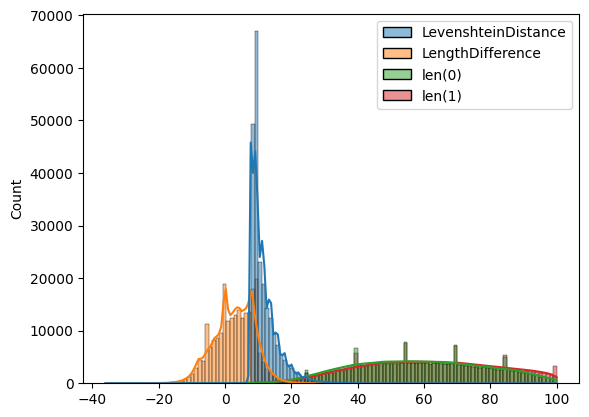

In [14]:
# Plotting a histogram with a kernel density estimate (KDE) for rows in df7 where:
# - 'LevenshteinDistance' is between 7 and 42
# - The length of sentences in both columns '0' and '1' are less than 101 characters
# This is done using Seaborn's histplot function
sns.histplot(df7[(df7['LevenshteinDistance'] > 7) & (df7['LevenshteinDistance'] < 42) & (df7['len(0)'] < 101) & (df7['len(1)'] < 101)], kde=True)

# Displaying the plot
plt.show()

In [15]:
# Filtering the DataFrame 'df7' based on the following conditions:
# - 'LevenshteinDistance' is between 7 and 42
# - The length of sentences in columns '0' and '1' is less than 101 characters
# The filtered rows are stored in a new DataFrame 'df_filtered'
df_filtered = df7[(df7['LevenshteinDistance'] > 7) & (df7['LevenshteinDistance'] < 42) & (df7['len(0)'] < 101) & (df7['len(1)'] < 101)]

# Displaying the filtered DataFrame 'df_filtered'
df_filtered

,0,1,LevenshteinDistance,LengthDifference,len(0),len(1)
31,the president was standing in the front row an...,the president was standing in the front row an...,8,-2,96,94
43,"in us, i heard that arrested people will not l...","in the us, i heard that people arrested will n...",18,4,61,65
56,"especailly, writting.","in particular, writing.",11,2,21,23
61,"i always practice pronounce, but getting more ...","i always practise pronunciation, but it is get...",14,10,56,66
63,"if i said that sentence, people will be heard ...","if i said that sentence, people would hear the...",10,0,66,66
...,...,...,...,...,...,...
2350934,smokers will waste much money buying cigarette...,smokers waste a lot of money buying cigarettes...,14,-2,73,71
2350939,smoking can lead the air pollution and many pr...,smoking can lead to air pollution and many oth...,16,11,68,79
2350940,"in addition, smoking is the reason for fired b...","in addition, smoking is the reason for fires.",10,-9,54,45
2350974,then ask where did u buy ur bag.,then asked where she had bought her bag.,14,8,32,40


### Step 8:  Normalized Levenshtein Distance Filtering

In [16]:
# Creating a new column 'LevDist_over_len(0)' that represents the ratio of Levenshtein distance to the length of sentences in column '0'
df_filtered['LevDist_over_len(0)'] = df_filtered['LevenshteinDistance'] / df_filtered['len(0)']

# Creating a new column 'LevDist_over_len(1)' that represents the ratio of Levenshtein distance to the length of sentences in column '1'
df_filtered['LevDist_over_len(1)'] = df_filtered['LevenshteinDistance'] / df_filtered['len(1)']

# Creating a new column 'LevDist_over_min_len' that represents the ratio of Levenshtein distance to the minimum length between the two columns '0' and '1'
df_filtered['LevDist_over_min_len'] = df_filtered['LevenshteinDistance'] / df_filtered[['len(0)', 'len(1)']].min(axis=1)

# Creating a new column 'LevDist_over_max_len' that represents the ratio of Levenshtein distance to the maximum length between the two columns '0' and '1'
df_filtered['LevDist_over_max_len'] = df_filtered['LevenshteinDistance'] / df_filtered[['len(0)', 'len(1)']].max(axis=1)

# Displaying the updated DataFrame 'df_filtered' with the new calculated columns
df_filtered

,0,1,LevenshteinDistance,LengthDifference,len(0),len(1),LevDist_over_len(0),LevDist_over_len(1),LevDist_over_min_len,LevDist_over_max_len
31,the president was standing in the front row an...,the president was standing in the front row an...,8,-2,96,94,0.083333,0.085106,0.085106,0.083333
43,"in us, i heard that arrested people will not l...","in the us, i heard that people arrested will n...",18,4,61,65,0.295082,0.276923,0.295082,0.276923
56,"especailly, writting.","in particular, writing.",11,2,21,23,0.523810,0.478261,0.523810,0.478261
61,"i always practice pronounce, but getting more ...","i always practise pronunciation, but it is get...",14,10,56,66,0.250000,0.212121,0.250000,0.212121
63,"if i said that sentence, people will be heard ...","if i said that sentence, people would hear the...",10,0,66,66,0.151515,0.151515,0.151515,0.151515
...,...,...,...,...,...,...,...,...,...,...
2350934,smokers will waste much money buying cigarette...,smokers waste a lot of money buying cigarettes...,14,-2,73,71,0.191781,0.197183,0.197183,0.191781
2350939,smoking can lead the air pollution and many pr...,smoking can lead to air pollution and many oth...,16,11,68,79,0.235294,0.202532,0.235294,0.202532
2350940,"in addition, smoking is the reason for fired b...","in addition, smoking is the reason for fires.",10,-9,54,45,0.185185,0.222222,0.222222,0.185185
2350974,then ask where did u buy ur bag.,then asked where she had bought her bag.,14,8,32,40,0.437500,0.350000,0.437500,0.350000


In [ ]:
# Defining the list of columns to plot histograms for
columns_to_plot = ['LevDist_over_len(0)', 'LevDist_over_len(1)', 'LevDist_over_min_len', 'LevDist_over_max_len']

# Creating a 2x2 grid of subplots with a figure size of 12x10 inches
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Flattening the axes array to make it easier to iterate over
axes = axes.flatten()

# Looping through each column in 'columns_to_plot' and plotting a histogram with KDE (Kernel Density Estimation)
for i, col in enumerate(columns_to_plot):
    sns.histplot(df_filtered[col], kde=True, ax=axes[i])  # Plotting histogram with KDE
    axes[i].set_title(f'Histogram of {col}')  # Setting the title of the plot
    axes[i].set_xlabel(col)  # Setting the x-axis label
    axes[i].set_ylabel('Frequency')  # Setting the y-axis label

# Adjusting the layout to ensure there is no overlap between subplots
plt.tight_layout()

# Displaying the plots
plt.show()

In [18]:
# Filtering the DataFrame 'df_filtered' based on the following conditions:
# - 'LevDist_over_len(0)' is between 0.08 and 0.5
# - 'LevDist_over_len(1)' is between 0.08 and 0.5
# - 'LevDist_over_min_len' is between 0.08 and 0.5
# - 'LevDist_over_max_len' is between 0.08 and 0.5
# The filtered rows are stored in a new DataFrame 'df_f'
df_f = df_filtered[(df_filtered['LevDist_over_len(0)'] > 0.08) & (df_filtered['LevDist_over_len(0)'] < 0.5) & 
                   (df_filtered['LevDist_over_len(1)'] > 0.08) & (df_filtered['LevDist_over_len(1)'] < 0.5) & 
                   (df_filtered['LevDist_over_min_len'] > 0.08) & (df_filtered['LevDist_over_min_len'] < 0.5) & 
                   (df_filtered['LevDist_over_max_len'] > 0.08) & (df_filtered['LevDist_over_max_len'] < 0.5)]

# Displaying the filtered DataFrame 'df_f'
df_f

,0,1,LevenshteinDistance,LengthDifference,len(0),len(1),LevDist_over_len(0),LevDist_over_len(1),LevDist_over_min_len,LevDist_over_max_len
31,the president was standing in the front row an...,the president was standing in the front row an...,8,-2,96,94,0.083333,0.085106,0.085106,0.083333
43,"in us, i heard that arrested people will not l...","in the us, i heard that people arrested will n...",18,4,61,65,0.295082,0.276923,0.295082,0.276923
61,"i always practice pronounce, but getting more ...","i always practise pronunciation, but it is get...",14,10,56,66,0.250000,0.212121,0.250000,0.212121
63,"if i said that sentence, people will be heard ...","if i said that sentence, people would hear the...",10,0,66,66,0.151515,0.151515,0.151515,0.151515
70,i just learnt alphabet.,i have just learnt the alphabet.,9,9,23,32,0.391304,0.281250,0.391304,0.281250
...,...,...,...,...,...,...,...,...,...,...
2350934,smokers will waste much money buying cigarette...,smokers waste a lot of money buying cigarettes...,14,-2,73,71,0.191781,0.197183,0.197183,0.191781
2350939,smoking can lead the air pollution and many pr...,smoking can lead to air pollution and many oth...,16,11,68,79,0.235294,0.202532,0.235294,0.202532
2350940,"in addition, smoking is the reason for fired b...","in addition, smoking is the reason for fires.",10,-9,54,45,0.185185,0.222222,0.222222,0.185185
2350974,then ask where did u buy ur bag.,then asked where she had bought her bag.,14,8,32,40,0.437500,0.350000,0.437500,0.350000


### Saving Final CSV

In [ ]:
# Saving the filtered DataFrame 'df_f' to a CSV file named 'Cleaned_Lang8.csv'
# The 'index=False' argument ensures that the index column is not written to the file
df_f.to_csv('Cleaned_Lang8.csv', index=False)

### Graphs Plot

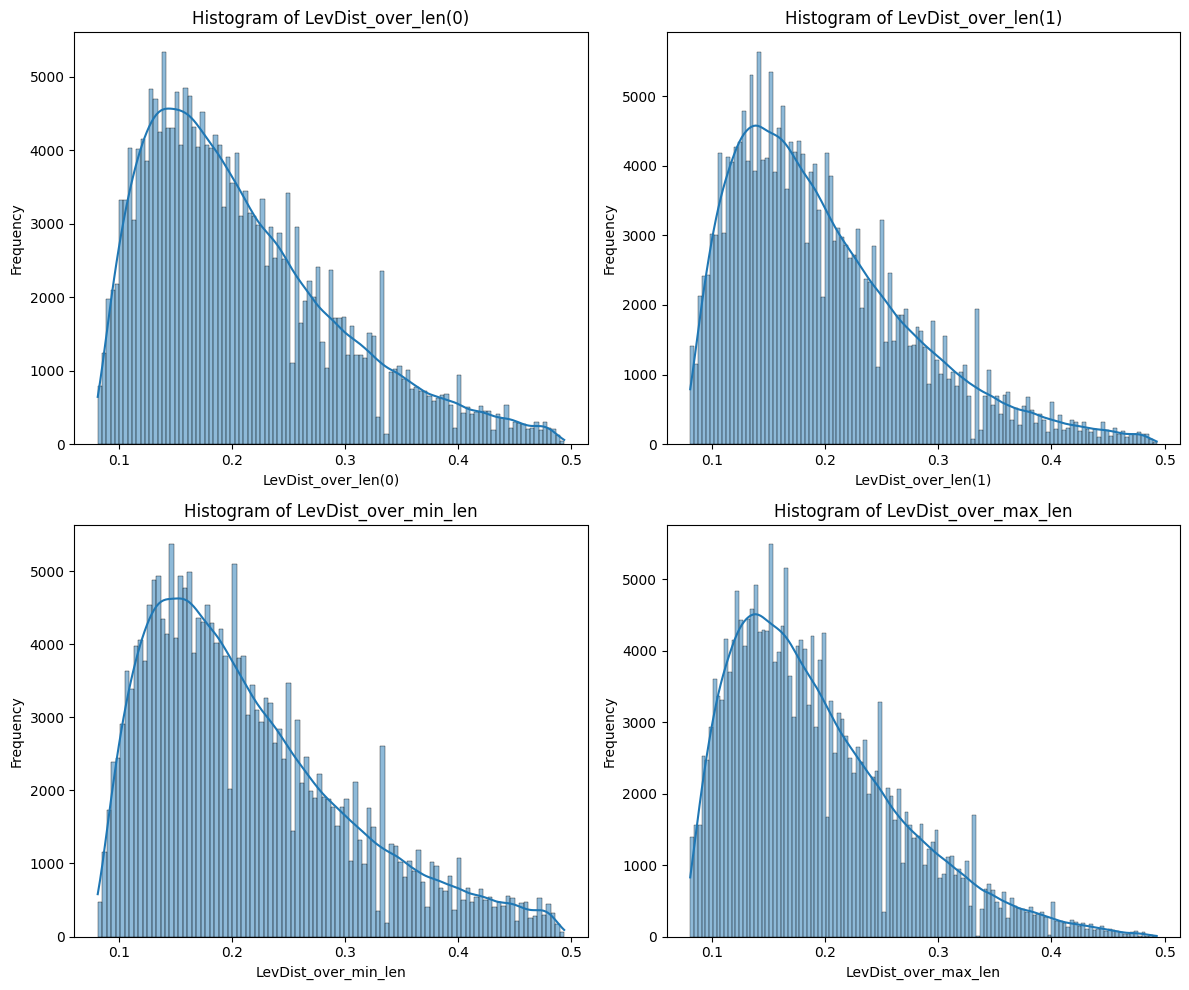

In [79]:
# Defining the list of columns to plot histograms for
columns_to_plot = ['LevDist_over_len(0)', 'LevDist_over_len(1)', 'LevDist_over_min_len', 'LevDist_over_max_len']

# Creating a 2x2 grid of subplots with a figure size of 12x10 inches
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Flattening the axes array to make it easier to iterate over
axes = axes.flatten()

# Looping through each column in 'columns_to_plot' and plotting a histogram with KDE (Kernel Density Estimation)
for i, col in enumerate(columns_to_plot):
    sns.histplot(df_f[col], kde=True, ax=axes[i])  # Plotting histogram with KDE
    axes[i].set_title(f'Histogram of {col}')  # Setting the title of the plot
    axes[i].set_xlabel(col)  # Setting the x-axis label
    axes[i].set_ylabel('Frequency')  # Setting the y-axis label

# Adjusting the layout to ensure there is no overlap between subplots
plt.tight_layout()

# Displaying the plots
plt.show()